In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.datasets import load_iris

iris = load_iris()
type(iris) 

sklearn.utils.Bunch

In [2]:
iris.data.shape

(150, 4)

In [3]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# Check the types of the features and response
type('iris.data')
type('iris.target')

str

In [6]:
# Values for features extracted
featuresAll=[]
features = iris.data[: , [0,1,2,3]]
features.shape

(150, 4)

In [7]:
# Values for targets
targets = iris.target
targets.reshape(targets.shape[0],-1)
targets.shape

(150,)

In [8]:
# Every observation gets appended into the list once it is read. For loop is used for iteration process
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])


Train Index: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] 


Test Index: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Train Index: 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 10

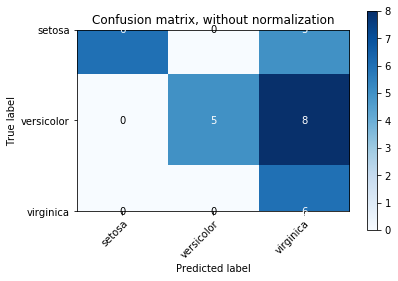

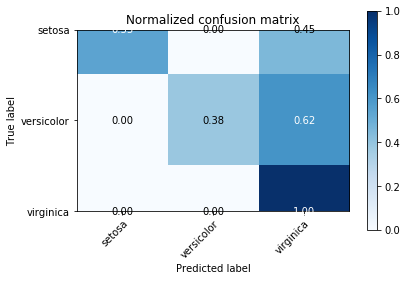

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

#--------------------------------- RBF SVM ------------------------------#
from sklearn.svm import SVC
#from sklearn.svm import SVR

sigma=0.1
gamma=1/(2*(sigma**2))

classifier = SVC(kernel='rbf', gamma=gamma, C=100000) 

from sklearn import metrics
from sklearn.model_selection import train_test_split


from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

scores = []
cv = KFold(n_splits=10, random_state=0, shuffle=False) #10-Fold CV 

#Data Split
for train_index, test_index in cv.split(X):
    print("\nTrain Index: \n", train_index, "\n")
    print("\nTest Index: \n", test_index)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
    classifier.fit(X_train, y_train.ravel()) #.ravel
    scores.append(classifier.score(X_test, y_test))    

for train_index, test_index in cv.split(X):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)    
#---------------------------------------------------------------------------------------#

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
        if normalize:
            title = '\nNormalized confusion matrix'
        else:
            title = '\nConfusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [18]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       1.00      0.38      0.56        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.77      0.64      0.58        30
weighted avg       0.86      0.57      0.60        30

